In [108]:
import Geometry as G
import numpy as np
import matplotlib.pyplot as plt

In [117]:
exp={'energy':64.351}
etalimit=86/180.0*np.pi

reload(G)
sample=G.CrystalStr()
sample.setPrim([3.61,0,0],[0,3.61,0],[0,0,3.61])
sample.addAtom([0,0,0],29)
sample.getRecipVec()
sample.getGs(13)

import RotRep as R
Det1=G.Detector()
Det1.Move(1024,2000,np.array([3.5,0,0]),R.EulerZXZ2Mat(np.array([90,90,360])/180.0*np.pi))
Det1.Print()

Norm:  [  1.00000000e+00  -6.12323400e-17   6.12323400e-17]
CoordOrigin:  [ 3.5     -1.51552  2.96   ]
J vector:  [  6.12323400e-17   1.00000000e+00  -2.44929360e-16]
K vector:  [  6.12323400e-17  -2.44929360e-16  -1.00000000e+00]


In [118]:
Peaks=[]
for g in sample.Gs:
    res=G.frankie_angles_from_g(g,verbo=False,**exp)
    if res['chi']>=90:
        pass
    elif res['eta']>etalimit:
        pass
    else:
        if -90<=res['omega_a']<=90:
            try:
                idx=Det1.IntersectionIdx(np.array([0,0,0]),res['2Theta'],res['eta'])
            except:
                print g
                print res
            if idx!=-1:
                Peaks.append([idx[0],idx[1],res['omega_a']])
        if -90<=res['omega_b']<=90:
            idx=Det1.IntersectionIdx(np.array([0,0,0]),res['2Theta'],-res['eta'])
            if idx!=-1:
                Peaks.append([idx[0],idx[1],res['omega_b']])

In [121]:
len(Peaks)

772

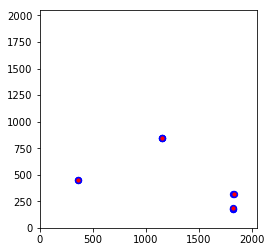

In [137]:
i=179
a=np.loadtxt('/home/fyshen13/workspace/SimStd/std{0:05d}.bin0'.format(i),delimiter=',')
plt.scatter(2048-a[:,0],2048-a[:,1],c='b',s=40)
tmpidx=((-90+i<=Peaks)*(Peaks<-89+i))[:,2]
tmpPeaks=Peaks[tmpidx]
for ii in range(len(tmpPeaks)):
    plt.scatter(2048-tmpPeaks[ii][0],2048-tmpPeaks[ii][1],c='r',s=10)
plt.axis('scaled')
plt.xlim((0,2048))
plt.ylim((0,2048))
plt.show()